1次元セル・オートマトンの実装
===
---
カオスの縁へ

## 1. import

In [1]:
import numpy as np
import numpy.random as random
import matplotlib.pyplot as plt
%matplotlib inline

## 2. セル・オートマトンの実装
### 2.1. クラスを定義

In [2]:
class CellularAutomaton1D():
    """ One-dimensional cellular automaton """
    
    def __init__(self, grid, rule=30):
        """ Constructor
        - grid: 各セルの状態を収めたNumpy Array(0: 死, 1: 生)
        - rule: 誕生・生存の条件をWolfram codeに基づいて整数で表現したもの
        """
        assert rule in range(256), "Wolfram code out of range!"
        self.grid = np.int8(grid)  # grid: 各セルの状態(生死)を保持する
        self.rule = rule
    
    def __iter__(self):
        """ イテレータオブジェクトを返す """
        while True:
            yield self.grid
            self.update()  # セルの状態を更新

    def update(self):
        """ ライフゲームのルールに従って各セルの状態(生死)を更新する """
        new_grid = np.zeros(self.grid.shape, dtype=np.int8)  # 更新後の状態
        # すべてのセルについてループ
        for i in range(len(self.grid)):
            neighbor_code = 4*self.grid[i-1] + 2*self.grid[i] + self.grid[(i+1)%len(self.grid)]
            if (self.rule / 2**neighbor_code) % 2 == 1:
                new_grid[i] = 1
        self.grid = new_grid

### 2.2. 動作確認

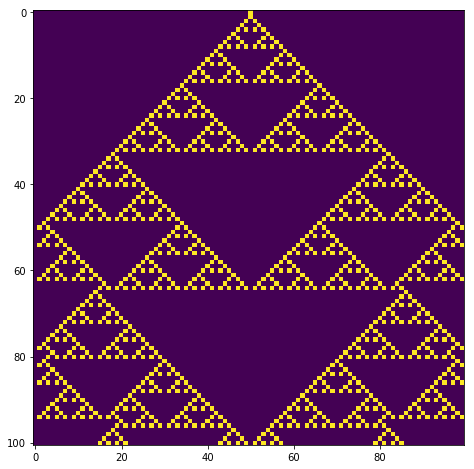

In [3]:
# 初期状態
initial_grid = np.zeros(100)
initial_grid[50] = 1

# セル・オートマトンの定義
ca = CellularAutomaton1D(initial_grid, rule=90)

# 描画
grids = ca.grid
for step, grid in zip(range(100), ca):
    grids = np.vstack((grids, grid))
    
fig = plt.figure(figsize=(8, 8))
plt.imshow(grids)

### 2.3. すべてのルールに基づいたプロット

In [4]:
def show_rule(wolfram_code):
    """ ルールをWolfram code(0-255)で指定すると100x100のarrayで実行結果を返す """
    initial_grid = np.zeros(100)
    initial_grid[50] = 1

    # セル・オートマトンの定義
    ca = CellularAutomaton1D(initial_grid, rule=wolfram_code)

    # 描画
    grids = ca.grid
    for step, grid in zip(range(100), ca):
        grids = np.vstack((grids, grid))
    return grids

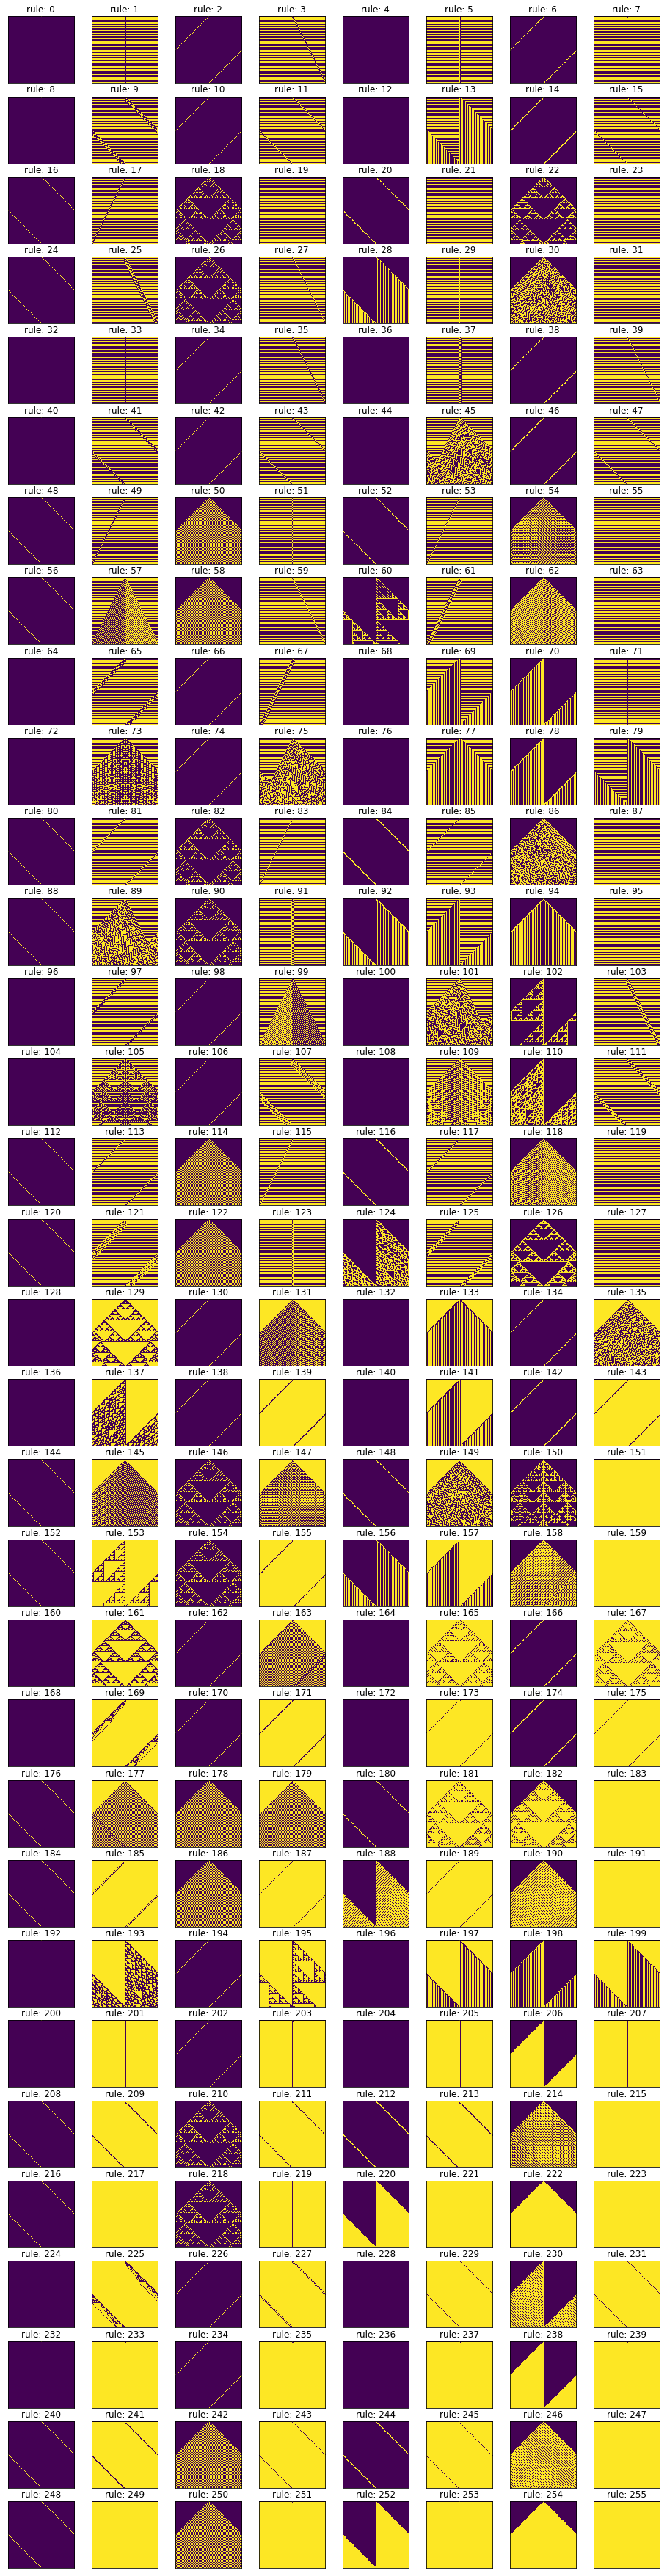

In [5]:
fig = plt.figure(figsize=(16, 64))
for i in range(256):
    ax = fig.add_subplot(32, 8, i+1)
    ax.imshow(show_rule(i))
    
    ax.set_title("rule: {}".format(i))
    ax.tick_params(labelbottom="off",bottom="off") # x軸の削除
    ax.tick_params(labelleft="off",left="off") # y軸の削除